In [43]:
#######################
# Import dependencies #
#######################
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [29]:
#######################
# Read and clean data #
#######################
df = pd.read_csv("crypto_data.csv")
df = df.loc[df['IsTrading'] == True]
df = df.loc[df['TotalCoinsMined'] > 0]
df["TotalCoinSupply"] = df["TotalCoinSupply"].astype(float)
df = df.dropna()
df = df.reset_index()
df.drop(['index', 'Unnamed: 0', 'CoinName','IsTrading'],axis='columns', inplace=True)
df = df.drop_duplicates()
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [30]:
################
# Make Dummies #
################
df = pd.get_dummies(df)
df


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
##################
# Scale the data #
##################
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TotalCoinsMined', 'TotalCoinSupply']])
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:2])
scaled_df

,TotalCoinsMined,TotalCoinSupply
0,-0.117219,-0.153017
1,-0.094102,-0.145163
2,0.524239,4.485014
3,-0.116826,-0.152707
4,-0.114860,-0.153017
...,...,...
526,-0.073403,-0.123490
527,-0.116892,-0.149326
528,-0.095744,-0.132345
529,-0.117059,-0.152707


In [32]:
########################################
# Add all the columns to the scaled df #
########################################
for x in df.columns[2:]:
    scaled_df[x] = df[x].tolist()
scaled_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117219,-0.153017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.094102,-0.145163,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524239,4.485014,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116826,-0.152707,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114860,-0.153017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,-0.073403,-0.123490,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,-0.116892,-0.149326,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
528,-0.095744,-0.132345,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,-0.117059,-0.152707,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
##################
# Initialize PCA #
##################
pca = PCA(n_components=.9)
crypto_pca = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=crypto_pca, columns=["principal component 1", "principal component 2"])
df_pca.head()
pca.explained_variance_ratio_

array([0.85114593, 0.14885407])

In [55]:
#########
# t-SNE #
#########
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df)

C:\Users\12108\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


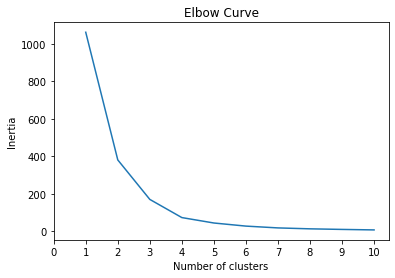

In [44]:
#################################
# Cluster Analysis with k-Means #
#################################
inertia = []
k = list(range(1, 11))
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [54]:
################################
# Predicting clusters with k=4 #
################################

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class column to the dataframe
df_pca["class"] = model.labels_
df_pca.head()

,principal component 1,principal component 2,class
0,-0.191086,-0.025313,0
1,-0.169186,-0.036106,0
2,3.542077,2.800691,3
3,-0.190589,-0.025371,0
4,-0.189418,-0.026981,0


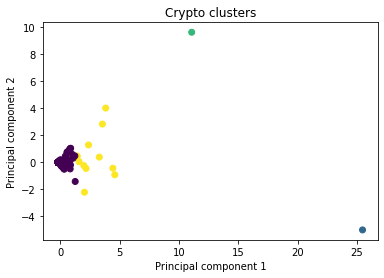

In [52]:
##########################
# Visualize the clusters #
##########################
plt.scatter(x=df_pca['principal component 1'], y=df_pca['principal component 2'], c=df_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto clusters')
plt.show()